In [2]:
from pathlib import Path
repos_path = Path('/home/kostis/repos')
subdirs_without_underscore = [
    d for d in repos_path.glob('*')
    if d.is_dir() and '_' not in d.name
]


In [3]:
print(subdirs_without_underscore)

[PosixPath('/home/kostis/repos/seaborn'), PosixPath('/home/kostis/repos/pytest'), PosixPath('/home/kostis/repos/requests'), PosixPath('/home/kostis/repos/sympy'), PosixPath('/home/kostis/repos/sphinx'), PosixPath('/home/kostis/repos/scikit-learn'), PosixPath('/home/kostis/repos/django'), PosixPath('/home/kostis/repos/flask')]


In [4]:
# Dictionary to hold the count of files for each subdirectory
files_count = {}

for subdir in subdirs_without_underscore:
    # Use rglob to recursively list all entries and filter only files
    count = sum(1 for file in subdir.rglob('*') if file.is_file())
    files_count[subdir.name] = count

print(files_count)


{'seaborn': 354, 'pytest': 463, 'requests': 194, 'sympy': 1992, 'sphinx': 1942, 'scikit-learn': 1247, 'django': 6677, 'flask': 273}


In [5]:
from pathlib import Path


def get_repo_stats(repo_path: Path) -> dict:
    """
    Returns a dictionary containing:
      - total_file_count: total number of files in the repo (recursively obtained)
      - file_types: a dict where each key is a file extension (or 'no_ext' if there is none)
          and the value is a dict with:
             'count': number of files with that extension
             'average_lines': average line count per file (if file can be read)
    """
    stats = {'total_file_count': 0, 'file_types': {}}

    # Iterate recursively over all files in current repository
    for file in repo_path.rglob('*'):
        if file.is_file():
            stats['total_file_count'] += 1

            # Use the file extension (lowercase) or 'no_ext' if empty
            ext = file.suffix.lower() or 'no_ext'
            if ext not in stats['file_types']:
                stats['file_types'][ext] = {'count': 0, 'total_lines': 0}

            stats['file_types'][ext]['count'] += 1

            # Try to open the file and count lines; skip files that can't be read
            try:
                with file.open('r', encoding='utf-8') as f:
                    line_count = sum(1 for line in f)
                stats['file_types'][ext]['total_lines'] += line_count
            except Exception:
                # You might not be able to process binary files or files with another encoding.
                pass

    # Compute average line count per file type, then remove the total_lines key if no longer needed
    for ext, data in stats['file_types'].items():
        count = data['count']
        total_lines = data['total_lines']
        avg_lines = total_lines / count if count > 0 else 0
        data['average_lines'] = avg_lines
        # Optionally remove the intermediate key
        del data['total_lines']

    return stats


# Define the path to your repositories
repos_path = Path('/home/kostis/repos')

# Create a dictionary to store statistics for each repository
repo_stats = {}

# Iterate over the subdirectories (each repo) without an underscore in their name
for repo in repos_path.glob('*'):
    if repo.is_dir() and '_' not in repo.name:
        stats = get_repo_stats(repo)
        # Optionally, sort the file types by the count in descending order
        sorted_file_types = dict(sorted(stats['file_types'].items(), key=lambda item: item[1]['count'], reverse=True))
        stats['file_types'] = sorted_file_types
        repo_stats[repo.name] = stats

from pprint import pprint
pprint(repo_stats)

{'django': {'file_types': {'.1': {'average_lines': 2826.0, 'count': 1},
                           '.bat': {'average_lines': 199.0, 'count': 1},
                           '.bmp': {'average_lines': 0.0, 'count': 1},
                           '.bz2': {'average_lines': 0.0, 'count': 3},
                           '.cfg': {'average_lines': 69.0, 'count': 1},
                           '.conf': {'average_lines': 6.0, 'count': 2},
                           '.css': {'average_lines': 130.5952380952381,
                                    'count': 42},
                           '.csv': {'average_lines': 4.0, 'count': 1},
                           '.dbf': {'average_lines': 0.4444444444444444,
                                    'count': 9},
                           '.djtpl': {'average_lines': 8.0, 'count': 1},
                           '.egg': {'average_lines': 0.0, 'count': 7},
                           '.eml': {'average_lines': 44.0, 'count': 1},
                           '.eot': {'a

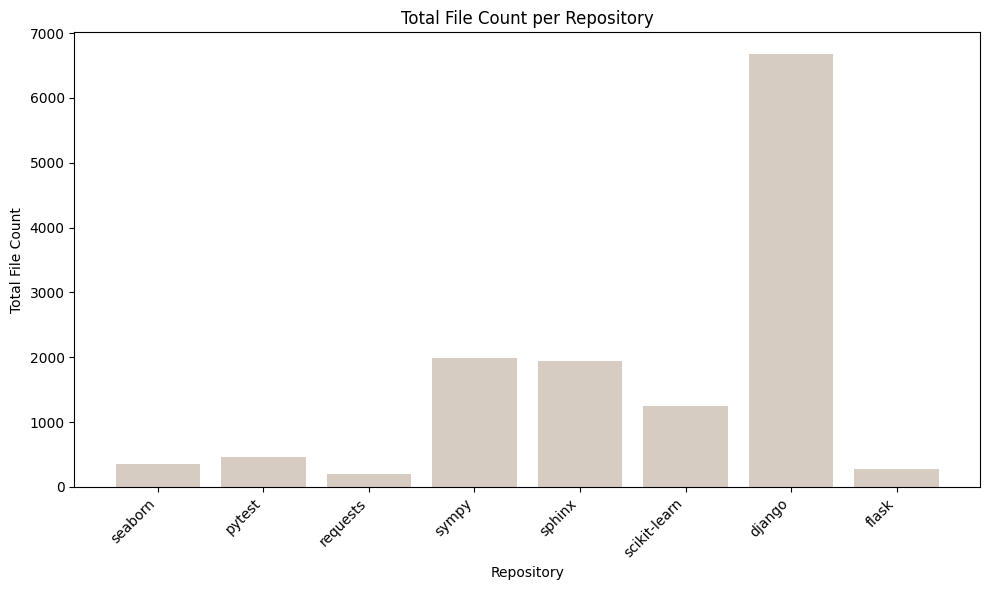

In [7]:
import matplotlib.pyplot as plt

# Define the bar color
bar_color = "#d6ccc2"

# Prepare the data for plotting
repo_names = list(repo_stats.keys())
total_file_counts = [repo_stats[repo]["total_file_count"] for repo in repo_names]

plt.figure(figsize=(10, 6))
plt.bar(repo_names, total_file_counts, color=bar_color)
plt.xlabel('Repository')
plt.ylabel('Total File Count')
plt.title('Total File Count per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure before displaying it
plt.savefig("total_file_count_per_repository.png")
plt.show()


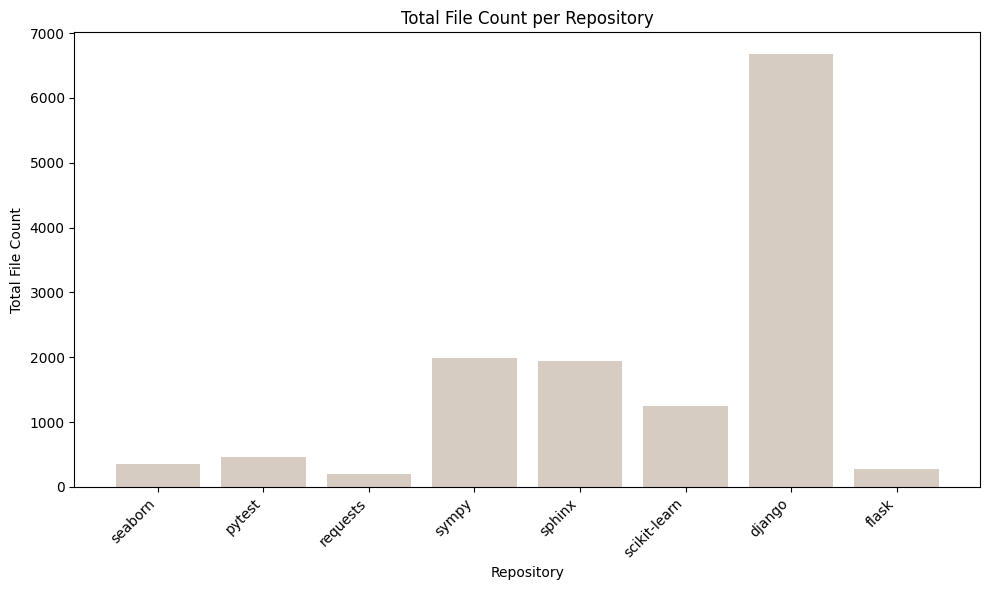

<Figure size 640x480 with 0 Axes>

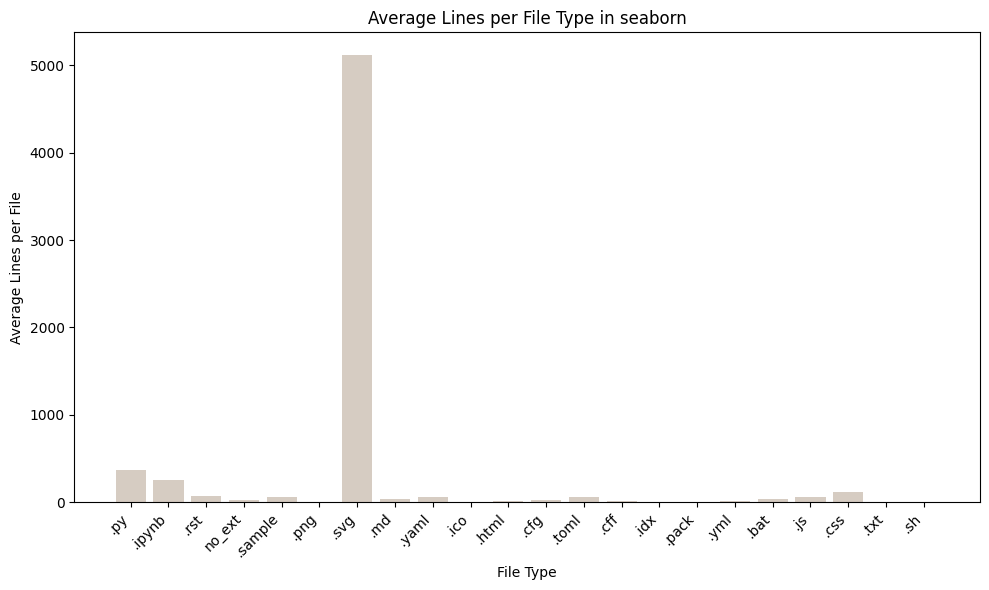

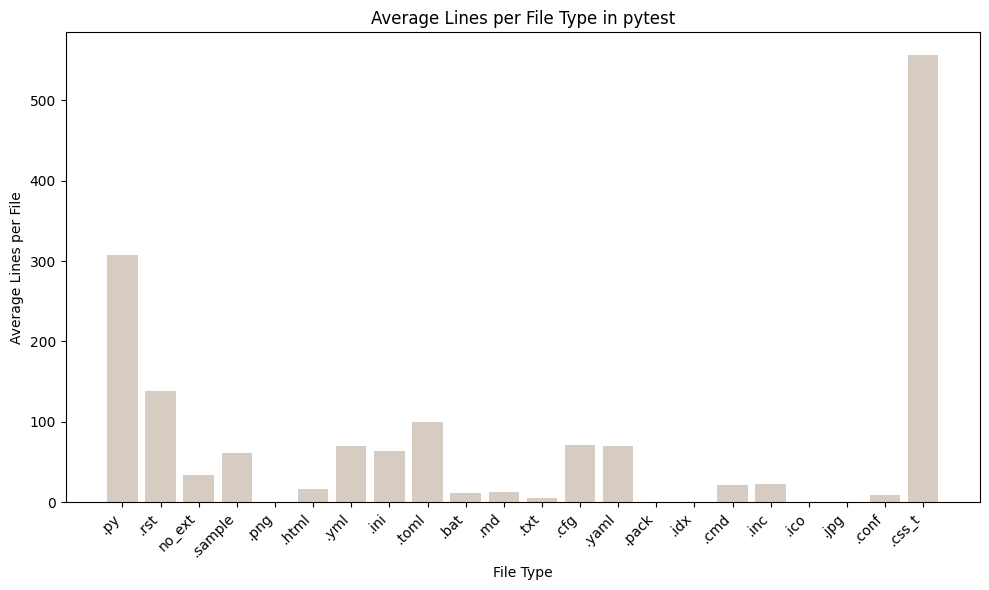

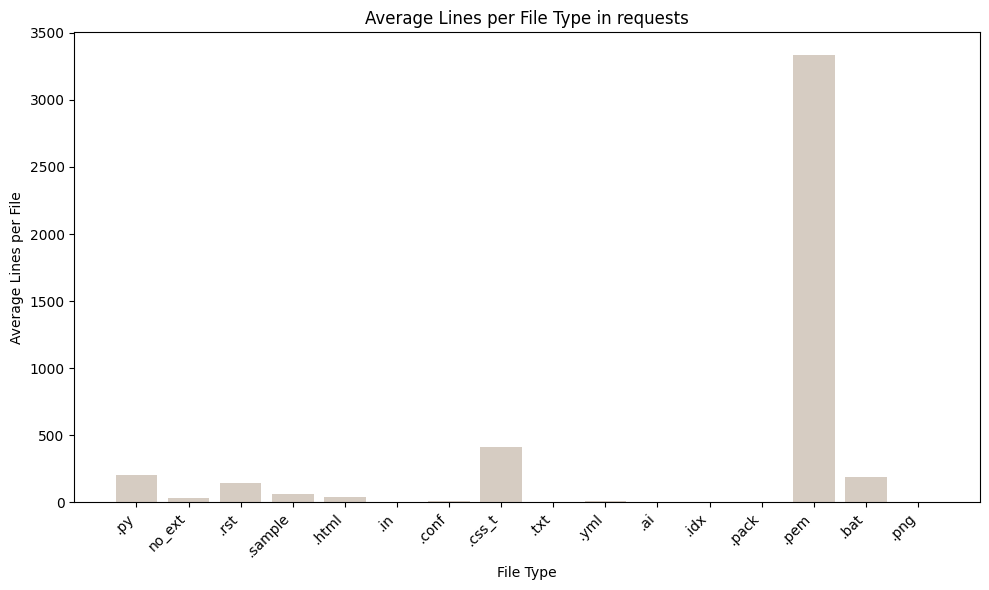

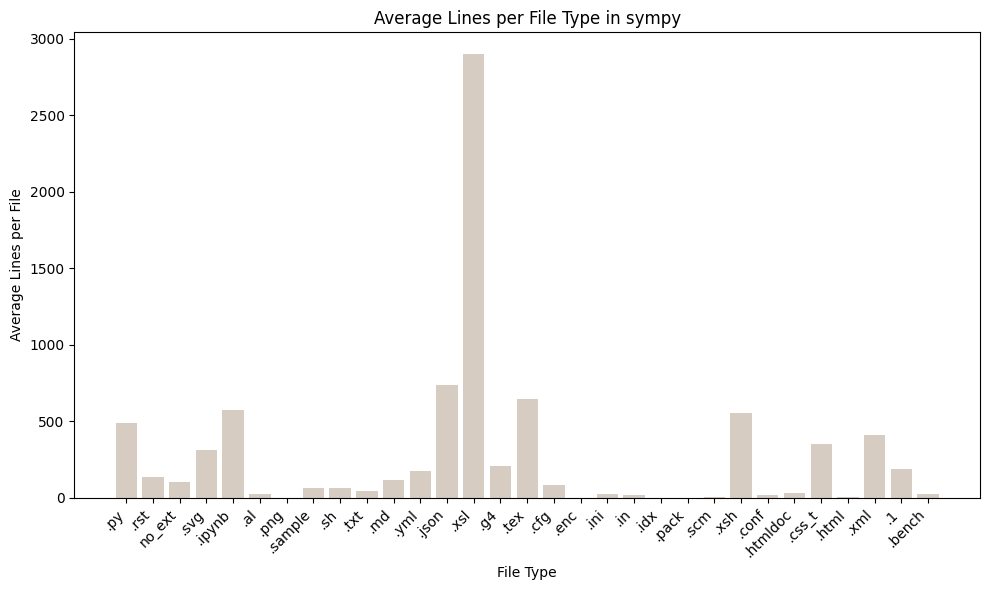

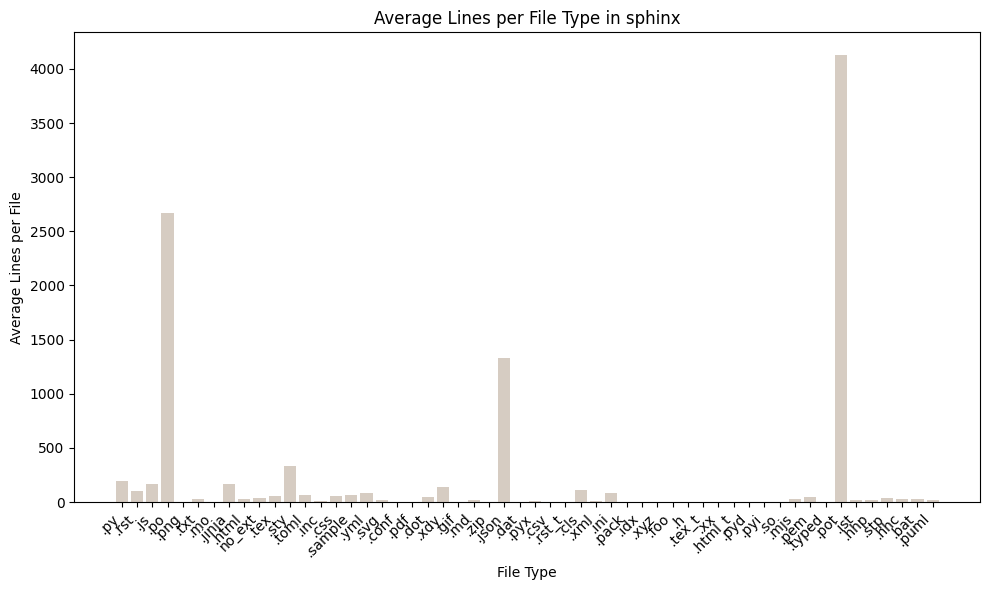

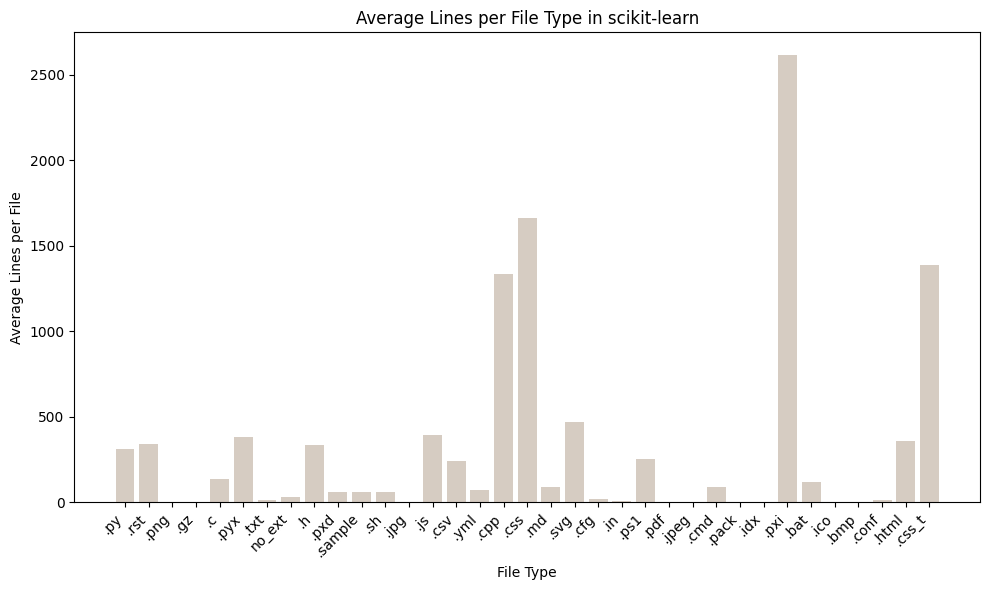

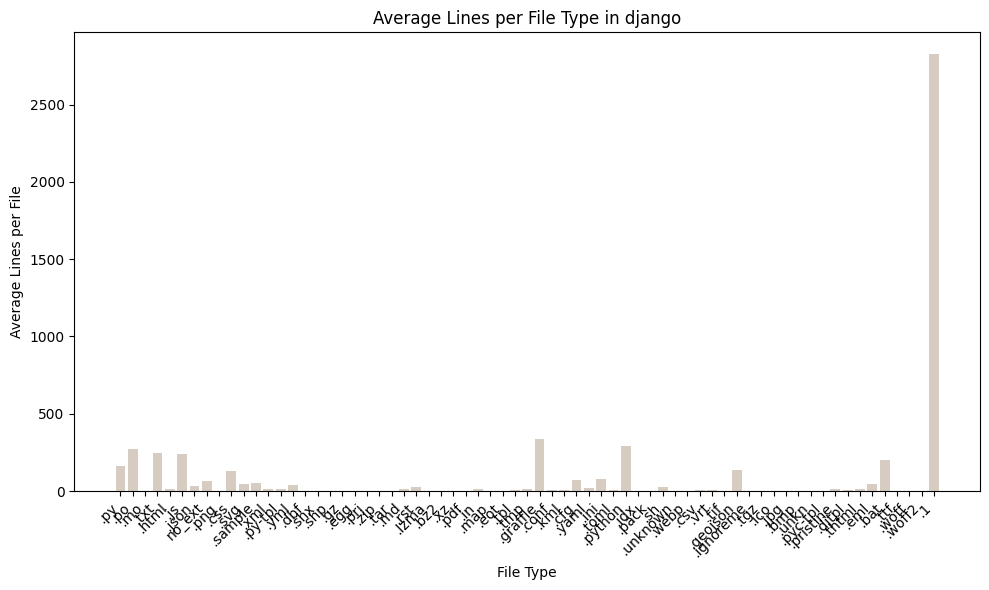

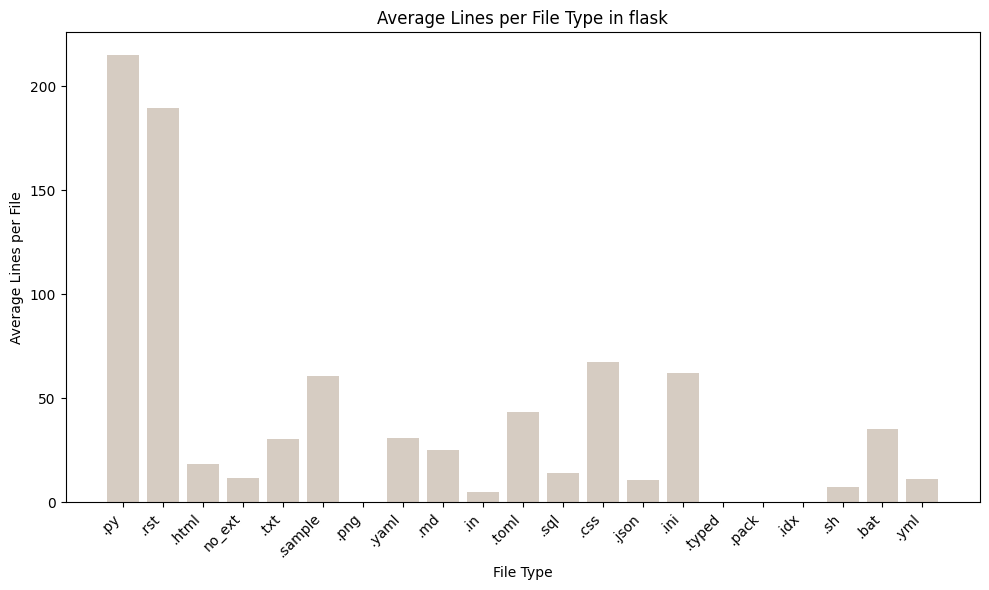

In [6]:
import matplotlib.pyplot as plt

# Define the bar color
bar_color = "#d6ccc2"

# Assume repo_stats is already created from previous computations with this structure:
# repo_stats = {
#     "repo_name": {
#         "total_file_count": int,
#         "file_types": {
#             ".py": {"count": int, "average_lines": float},
#             "no_ext": {"count": int, "average_lines": float},
#             ...
#         }
#     },
#     ...
# }

# -------------------------
# 1. Overall Total File Count per Repository
# -------------------------
repo_names = list(repo_stats.keys())
total_file_counts = [repo_stats[repo]["total_file_count"] for repo in repo_names]

plt.figure(figsize=(10, 6))
plt.bar(repo_names, total_file_counts, color=bar_color)
plt.xlabel('Repository')
plt.ylabel('Total File Count')
plt.title('Total File Count per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.savefig("total_file_count_per_repository.png")


# -------------------------
# 3. Average Lines per File Type for each Repository
# -------------------------
for repo, stats in repo_stats.items():
    file_types = list(stats["file_types"].keys())
    avg_lines = [stats["file_types"][ft]["average_lines"] for ft in file_types]

    plt.figure(figsize=(10, 6))
    plt.bar(file_types, avg_lines, color=bar_color)
    plt.xlabel('File Type')
    plt.ylabel('Average Lines per File')
    plt.title(f'Average Lines per File Type in {repo}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [29]:
import os; os.getcwd()

'/mnt/c/Users/kosti/PycharmProjects/SoftwareDeveloperAgents'

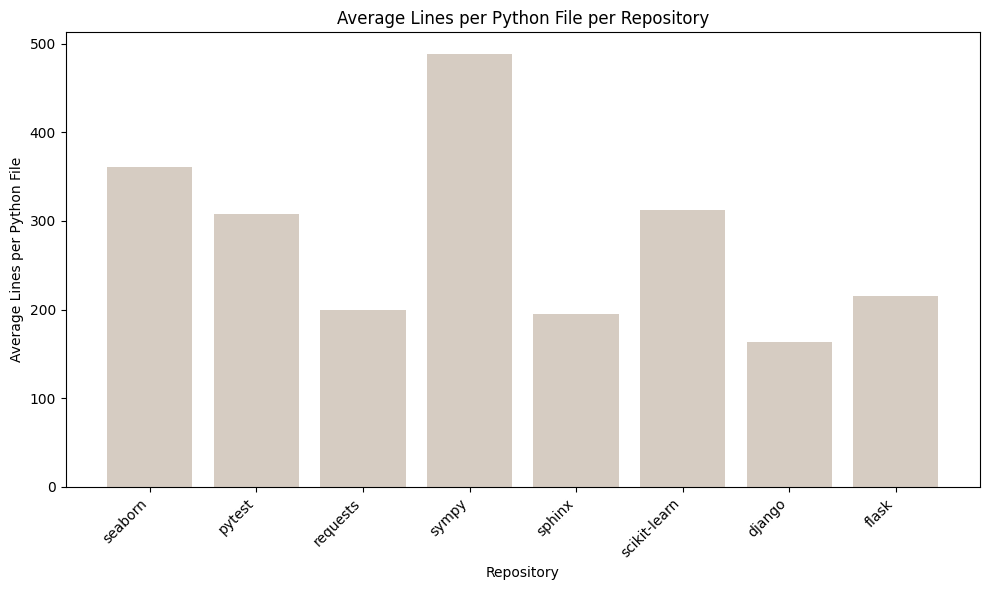

In [22]:
import matplotlib.pyplot as plt

# Define the bar color
bar_color = "#d6ccc2"

# Prepare the data for plotting
repos = list(repo_stats.keys())
avg_lines_python = []

for repo in repos:
    # Get the stats for Python files if they exist; else use 0
    py_stats = repo_stats[repo]['file_types'].get('.py')
    avg_lines = py_stats['average_lines'] if py_stats else 0
    avg_lines_python.append(avg_lines)

plt.figure(figsize=(10, 6))
plt.bar(repos, avg_lines_python, color=bar_color)
plt.xlabel('Repository')
plt.ylabel('Average Lines per Python File')
plt.title('Average Lines per Python File per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure before showing it
plt.savefig("python_file_average_lines.png")

plt.show()


# save this figure


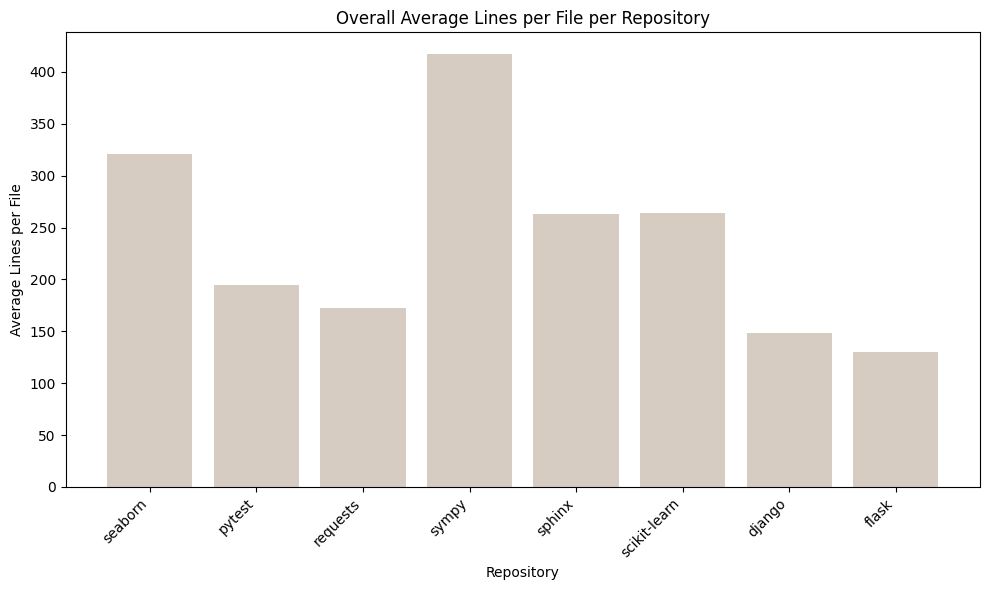

In [20]:
import matplotlib.pyplot as plt

# Define the bar color
bar_color = "#d6ccc2"

repos = list(repo_stats.keys())
overall_avg_lines = []

for repo in repos:
    stats = repo_stats[repo]
    total_average_lines = 0
    # For each file type, multiply the average lines by the number of files to accumulate total lines
    for file_type, data in stats["file_types"].items():
        total_average_lines += data["average_lines"] * data["count"]
    # Compute overall average lines by dividing the total lines by total file count
    if stats["total_file_count"] > 0:
        overall_avg = total_average_lines / stats["total_file_count"]
    else:
        overall_avg = 0
    overall_avg_lines.append(overall_avg)

plt.figure(figsize=(10, 6))
plt.bar(repos, overall_avg_lines, color=bar_color)
plt.xlabel('Repository')
plt.ylabel('Average Lines per File')
plt.title('Overall Average Lines per File per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
len(files_count)

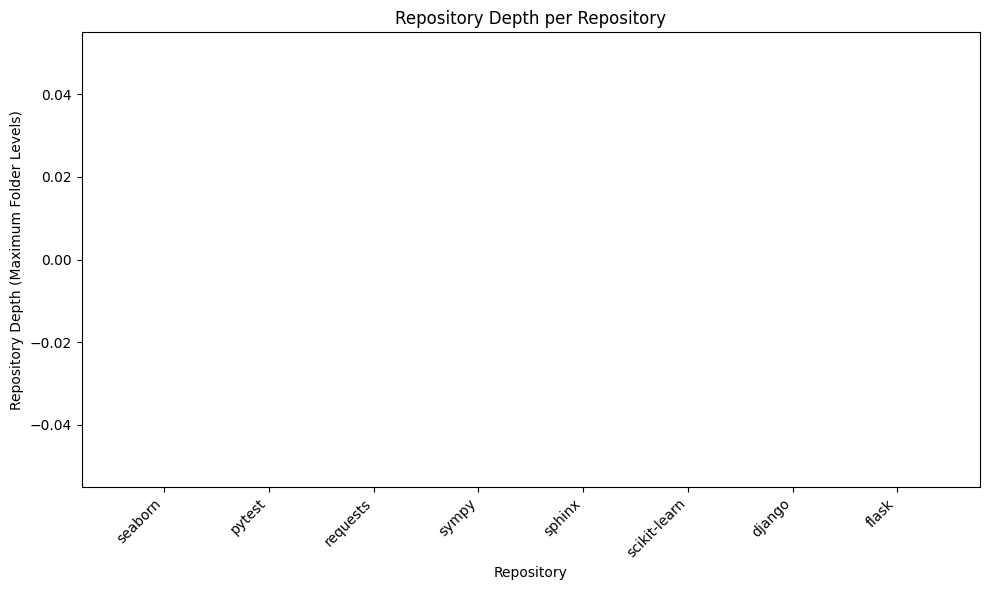

In [8]:
import os
import matplotlib.pyplot as plt

# Prepare the data for calculating repository depth
repo_names = list(repo_stats.keys())
repo_depths = []

for repo in repo_names:
    file_paths = repo_stats[repo].get("file_paths", [])
    if file_paths:
        # Calculate the depth (number of folder levels) for each file's directory
        depths = [len(os.path.dirname(path).split(os.sep)) for path in file_paths if os.path.dirname(path)]
        max_depth = max(depths) if depths else 0
    else:
        max_depth = 0
    repo_depths.append(max_depth)
    # Optionally, store the computed depth back in the repo_stats dictionary
    repo_stats[repo]["repository_depth"] = max_depth

# Plot the repository depth for each repository as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(repo_names, repo_depths, color="#d6ccc2")
plt.xlabel('Repository')
plt.ylabel('Repository Depth (Maximum Folder Levels)')
plt.title('Repository Depth per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save and show the figure
plt.savefig("repository_depth_per_repository.png")
plt.show()


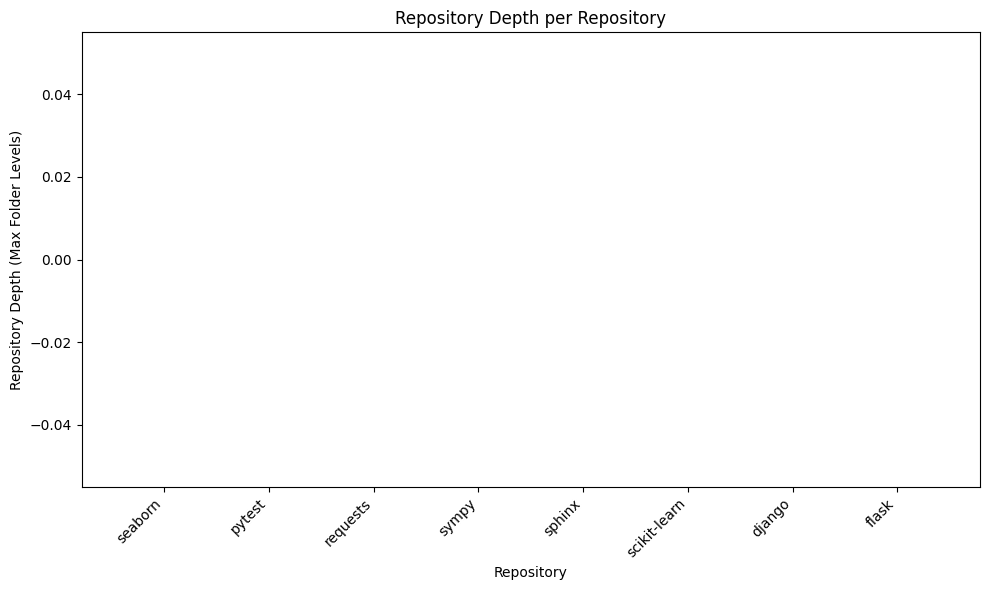

In [9]:
import os
import matplotlib.pyplot as plt

# Prepare the data for calculating repository depth
repo_names = list(repo_stats.keys())
repo_depths = []

for repo in repo_names:
    file_paths = repo_stats[repo].get("file_paths", [])
    if file_paths:
        # Calculate the depth (number of folder levels) for each file's directory
        depths = [len(os.path.dirname(path).split(os.sep)) for path in file_paths if os.path.dirname(path)]
        max_depth = max(depths) if depths else 0
    else:
        max_depth = 0
    repo_depths.append(max_depth)
    # Optionally, store the computed depth back in the repo_stats dictionary
    repo_stats[repo]["repository_depth"] = max_depth

# Plot the repository depth for each repository as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(repo_names, repo_depths, color="#d6ccc2")
plt.xlabel('Repository')
plt.ylabel('Repository Depth (Max Folder Levels)')
plt.title('Repository Depth per Repository')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure before displaying it
plt.savefig("repository_depth_per_repository.png")
plt.show()